In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
# find files
log_files = []
for path, subdirs, files in os.walk('logs'):
    for name in files:
        if name.endswith('.log'):
            log_file = os.path.join(path, name)
            log_files.append(log_file)

In [3]:
len(log_files)

40

In [4]:
def inverse_triangular(m):
    return round(math.sqrt(2 * m + 0.25) - 0.5)

In [5]:
records = []

for log_file in log_files:
    num_total_jobs = int(log_file.split('/')[-1].split('=')[-1].split('.')[0])
    with open(log_file) as file:
        for line in file:
            if line.startswith('solver:PROFILE'):
                line = line.strip()
                tokens = line.split()
                job_combinations = int(tokens[1].split(':')[-1])
                num_jobs = inverse_triangular(job_combinations)
                
                solve_time1 = float(tokens[2].split(':')[-1]) * 1000
                setup_time1 = float(tokens[3].split(':')[-1]) * 1000
                total_time1 = solve_time1 + setup_time1
                
                solve_time2 = float(tokens[4].split(':')[-1]) * 1000
                setup_time2 = float(tokens[5].split(':')[-1]) * 1000
                total_time2 = solve_time2 + setup_time2

                records.append((num_jobs, job_combinations, solve_time1, setup_time1, total_time1, solve_time2, setup_time2, total_time2))

data = pd.DataFrame(records, columns=['num_jobs', 'job_combinations', 
                                      'solve_time1_millis', 'setup_time1_millis', 'total_time1_millis', 
                                      'solve_time2_millis', 'setup_time2_millis', 'total_time2_millis'])

In [6]:
data

,num_jobs,job_combinations,solve_time1_millis,setup_time1_millis,total_time1_millis,solve_time2_millis,setup_time2_millis,total_time2_millis
0,12,78,1.631869,0.433504,2.065373,0.0,0.0,0.0
1,11,66,1.010622,0.301815,1.312437,0.0,0.0,0.0
2,8,36,0.562804,0.150917,0.713721,0.0,0.0,0.0
3,7,28,0.431297,0.109144,0.540441,0.0,0.0,0.0
4,6,21,0.336182,0.082875,0.419057,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1173,5,15,0.257360,0.102194,0.359554,0.0,0.0,0.0
1174,4,10,0.161473,0.066248,0.227721,0.0,0.0,0.0
1175,3,6,0.110547,0.053700,0.164247,0.0,0.0,0.0
1176,2,3,0.060513,0.033949,0.094462,0.0,0.0,0.0


In [7]:
data.to_csv('data.csv', index=False)

Once you have the `data`, you can plot. No need to run any cell above this point. Comment out the next cell instead.

In [8]:
# import pandas as pd
# import seaborn as sns
# data = pd.read_csv('data.csv')

In [9]:
data = data[data['job_combinations'] <= 1000]

Text(0, 0.5, 'Solving Time for Problem 1 (ms)')

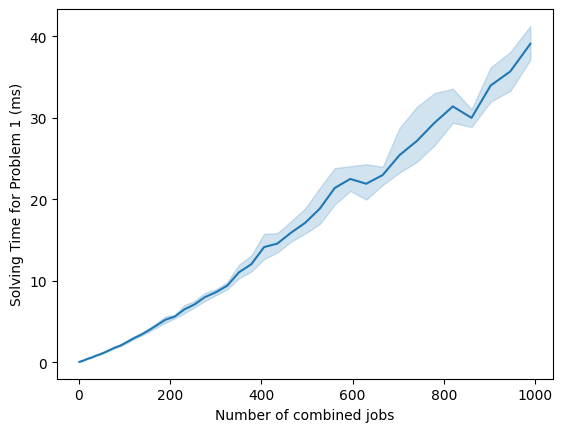

In [10]:
ax = sns.lineplot(data=data, x="job_combinations", y="total_time1_millis")
ax.set_xlabel('Number of combined jobs')
ax.set_ylabel('Solving Time for Problem 1 (ms)')

Text(0, 0.5, 'Solving Time for Problem 1 (ms)')

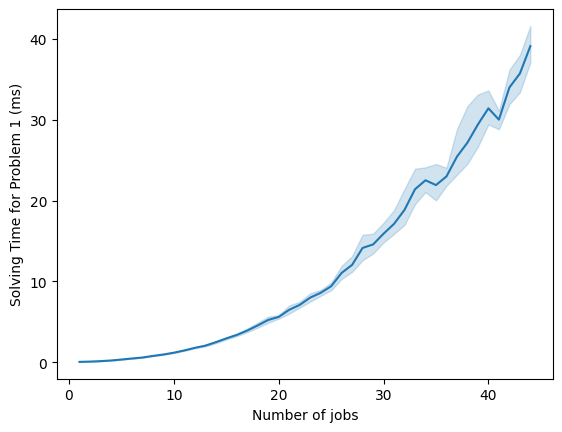

In [11]:
ax = sns.lineplot(data=data, x="num_jobs", y="total_time1_millis")
ax.set_xlabel('Number of jobs')
ax.set_ylabel('Solving Time for Problem 1 (ms)')

Text(0, 0.5, 'Solving Time for Problem 2 (ms)')

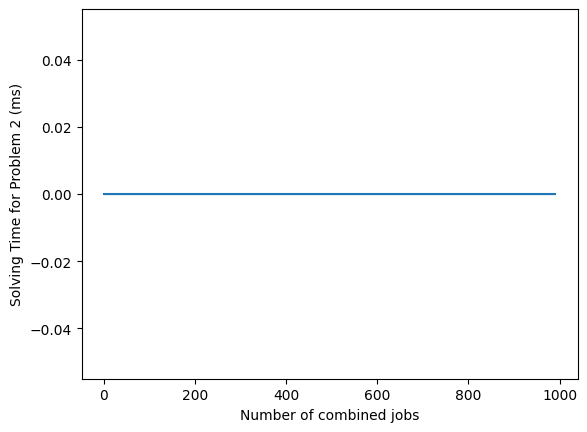

In [12]:
ax = sns.lineplot(data=data, x="job_combinations", y="total_time2_millis")
ax.set_xlabel('Number of combined jobs')
ax.set_ylabel('Solving Time for Problem 2 (ms)')

Text(0, 0.5, 'Solving Time for Problem 2 (ms)')

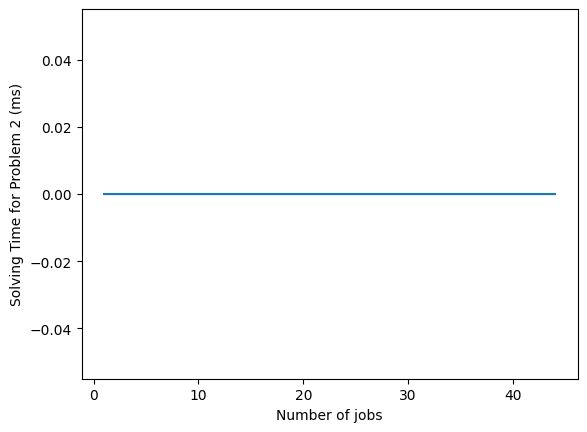

In [13]:
ax = sns.lineplot(data=data, x="num_jobs", y="total_time2_millis")
ax.set_xlabel('Number of jobs')
ax.set_ylabel('Solving Time for Problem 2 (ms)')